Here's an example notebook to demonstrate plotting issues and explore the impact of setting `axes.formatter.useOffset`.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print('numpnp.__version__

'1.18.1'

Define a `pandas.DataFrame` with some data.  This would work with `numpy.array` or `list` objects but I'll continue with a DataFrame.

In [3]:
x = np.random.rand(10)
df = pd.DataFrame({'min': x-1, 'max': x+1, 'mean': x}, index=pd.date_range('2000-01-01', periods=10, freq='AS'))
df

,min,max,mean
2000-01-01,-0.543953,1.456047,0.456047
2001-01-01,-0.406794,1.593206,0.593206
2002-01-01,-0.428159,1.571841,0.571841
2003-01-01,-0.809074,1.190926,0.190926
2004-01-01,-0.019250,1.980750,0.980750
2005-01-01,-0.337865,1.662135,0.662135
2006-01-01,-0.930537,1.069463,0.069463
2007-01-01,-0.197707,1.802293,0.802293
2008-01-01,-0.484945,1.515055,0.515055
2009-01-01,-0.324578,1.675422,0.675422


In notebooks, I think plot commands need to be run in one cell.  Notebooks (by default, I think) display plots automatically when the cell is executed (SHIFT-ENTER).  This is effectively the same as `plt.show()`.  So splitting plot calls over several cells will have the same results as putting `plt.show()` in the middle of plot calls.  So the following is what you sent as a screenshot. 

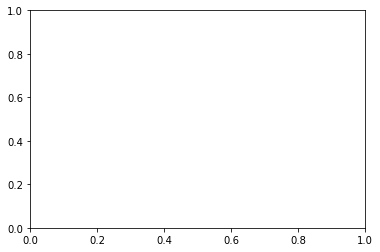

In [4]:
fig, ax = plt.subplots()

In [5]:
ax.fill_between(df['min'], df['max'], df.index, alpha=0.5)

In [6]:
ax.plot(df['mean'])

...but is you combine those cells.  Then it should work.

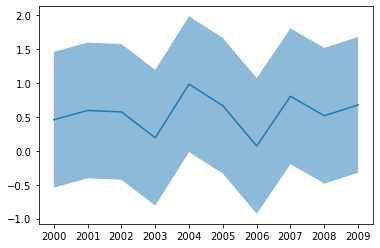

In [7]:
fig, ax = plt.subplots()
ax.fill_between(df.index, df['min'], df['max'], alpha=0.5)
ax.plot(df.index, df['mean'])

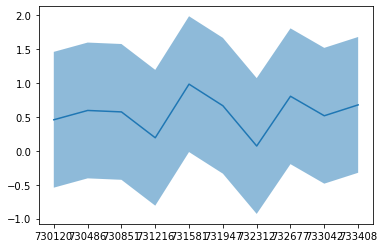

In [8]:
from matplotlib.ticker import ScalarFormatter

fig, ax = plt.subplots()
ax.fill_between(df.index, df['min'], df['max'], alpha=0.5)
ax.plot(df.index, df['mean'])
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))

## Plot Sea Ice Area data
Now plot some real sea ice extent data

The data are read using `pandas.read_csv` with `parse_dates=True` to convert the index column to a datetime object.

In [32]:
sia_df = pd.read_csv('SIA_nh_September_1979_2018.csv', header=0, skiprows=1, index_col=0, parse_dates=True)
sia_df

,Nasa_Team,Bootstrap,OSISAF
year,,,
1979-01-01,5686677.56,6515493.61,6316806.25
1980-01-01,5999588.86,7217570.12,6386937.50
1981-01-01,5564647.46,6732202.54,6153043.75
1982-01-01,5471257.05,6784375.56,5913731.25
1983-01-01,5805812.00,6951371.77,6303837.50
1984-01-01,5134071.34,6501015.97,5761000.00
1985-01-01,5316694.07,6405476.13,5943956.25
1986-01-01,5853475.04,6995529.03,6606512.50
1987-01-01,6016201.85,6962454.16,6487518.75


So I try plotting the data using `pandas` and directly using `matplotlib.pyplot`, and set `useOffset=False` in one of the cases.  This has the same effect as setting `rcParams` but the change in setting only applies to an `axis` instance.  `rcParams` sets the global plotting parameters.

The effect of setting `useOffset=False` in `pandas` appears to use some other index of the dataframe rather than using the `Datetime` index.  It looks like the number of months since the start of the axis or something.

I'm not sure why you want to change the offset as `matplotlib` deals with the time nicely both in `pandas` and when used directly.

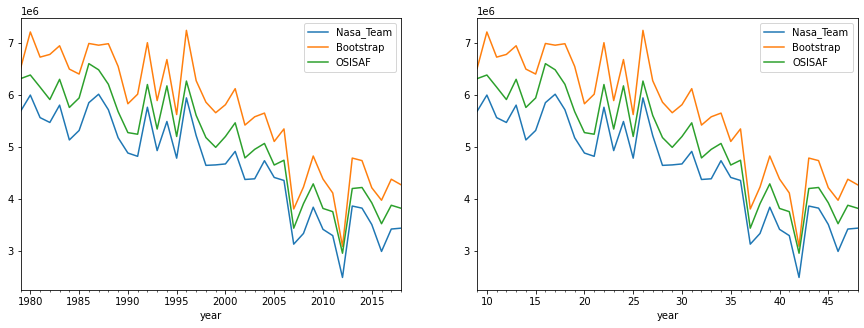

In [33]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sia_df.plot(ax=ax[0])
sia_df.plot(ax=ax[1])
ax[1].xaxis.set_major_formatter(ScalarFormatter(useOffset=False))

For the `matplotlib` example, the dates are represented as some other time unit.

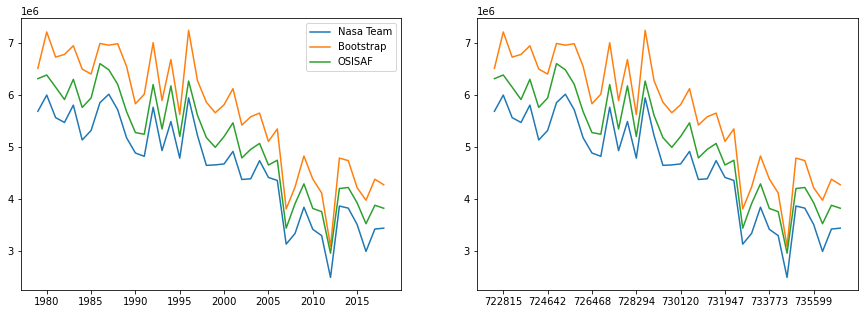

In [34]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(sia_df.index, sia_df.Nasa_Team, label='Nasa Team')
ax[0].plot(sia_df.index, sia_df.Bootstrap, label='Bootstrap')
ax[0].plot(sia_df.index, sia_df.OSISAF, label='OSISAF')
ax[0].legend()

ax[1].plot(sia_df.index, sia_df.Nasa_Team, label='Nasa Team')
ax[1].plot(sia_df.index, sia_df.Bootstrap, label='Bootstrap')
ax[1].plot(sia_df.index, sia_df.OSISAF, label='OSISAF')
ax[1].xaxis.set_major_formatter(ScalarFormatter(useOffset=False))